<a href="https://colab.research.google.com/github/hirokimituya/book_stock-price-analysis/blob/main/ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.3 MB/s eta 0:00:00


In [ ]:
from IPython.core.display import update_display
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-02-23 21:58:07--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-23 21:58:08--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-23 21:58:08--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [ ]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader(f'{code}.JP', 'stooq').sort_index()
  return df
  

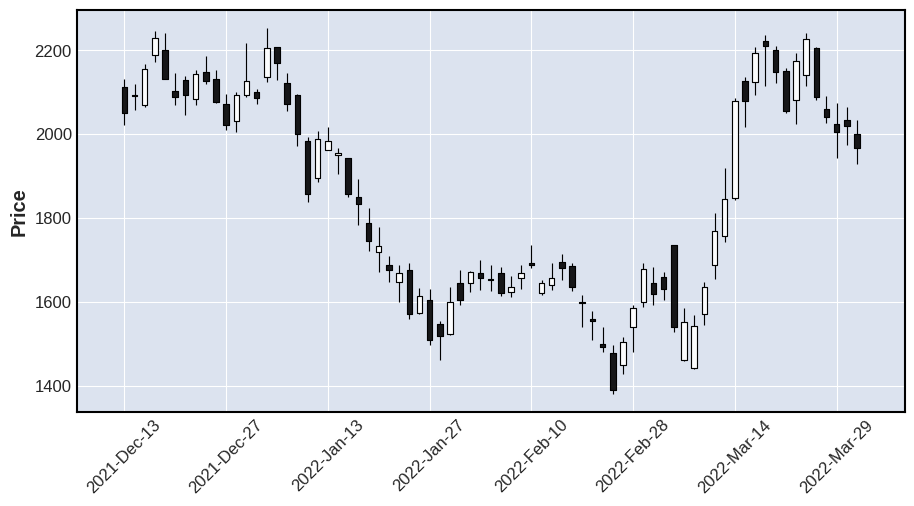

In [ ]:
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(2929)   # ファーマフーズ
rdf = df[dt.datetime(2021, 12, 11):dt.datetime(2022, 3, 31)]
mpf.plot(rdf, type='candle', figratio=(2, 1))

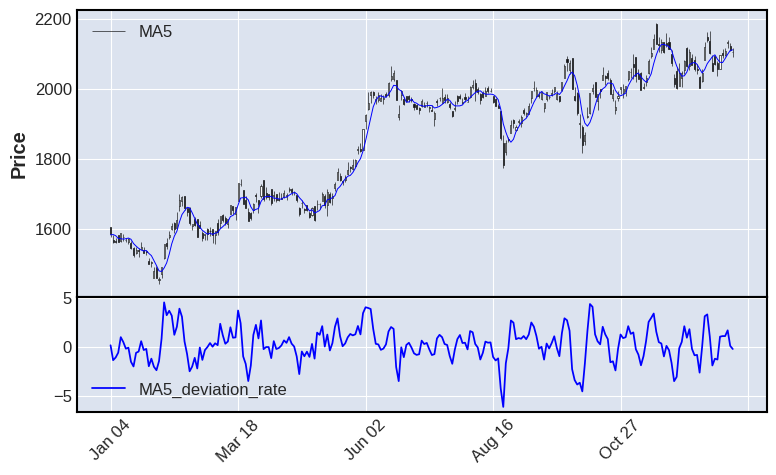

In [ ]:
df = get_stock_data(7203)   # トヨタ自動車
close = df['Close']

# 5日移動平均
df['ma5'] = ta.SMA(close, timeperiod=5)

# 乖離率
df['ma5_deviation_rate'] = (close - df['ma5']) / df['ma5'] * 100

rdf = df[dt.datetime(2021, 1, 1):dt.datetime(2021, 12, 31)]

apd = [
    # 5日移動平均
    mpf.make_addplot(rdf['ma5'], color='blue', panel=0, width=0.7),
    #　乖離率
    mpf.make_addplot(rdf['ma5_deviation_rate'], color='blue', panel=1)
]

fig, axes = mpf.plot(rdf, type='candle', figratio=(5, 3), addplot=apd, returnfig=True)
axes[0].legend(['MA5'])
axes[2].legend(['MA5_deviation_rate'])
fig.show()